In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from keras._tf_keras.keras.layers import Dense, Input
from keras._tf_keras.keras.models import Model

np.random.seed(123)
tf.random.set_seed(123)

In [2]:
from sklearn.metrics import mean_absolute_percentage_error

In [3]:
df = pd.read_csv('airline_passengers.csv', index_col='Month', parse_dates=True)

In [4]:
df['LogPassengers'] = np.log(df['Passengers'])

In [5]:
Ntest = 12
train = df.iloc[:-Ntest]
test = df.iloc[-Ntest:]

In [6]:
train_idx = df.index <= train.index[-1]
test_idx = df.index > train.index[-1]

In [7]:
df['DiffLogPassengers'] = df['LogPassengers'].diff()

In [10]:
series = df['DiffLogPassengers'].dropna().to_numpy()

T = 10
X = []
Y = []
q = True
for t in range(len(series) - T):
    x = series[t: t+T]
    X.append(x)
    y = series[t+T]
    Y.append(y)
    if q:
        print("X",X,'\n Y',Y )
        q = False
X = np.array(X).reshape(-1, T)
Y = np.array(Y)
N = len(X)
print("X.shape", X.shape, "Y.shape", Y.shape)

X [array([ 0.05218575,  0.1121173 , -0.02298952, -0.06402186,  0.10948423,
        0.0919375 ,  0.        , -0.08455739, -0.13353139, -0.13473259])] 
 Y [0.12629372532429262]
X.shape (133, 10) Y.shape (133,)


In [11]:
Xtrain, Ytrain = X[:-Ntest], Y[:-Ntest]
Xtest, Ytest = X[-Ntest:], Y[-Ntest:]

In [12]:
# Basic ANN
i = Input(shape=(T,))
x = Dense(32, activation='relu')(i)
x = Dense(1)(x)
model = Model(i,x)

In [13]:
model.compile(loss='mse', optimizer='adam')

In [14]:
r = model.fit(Xtrain, Ytrain, epochs=150, validation_data=(Xtest, Ytest))

Epoch 1/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 106ms/step - loss: 0.0113 - val_loss: 0.0103
Epoch 2/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0093 - val_loss: 0.0091
Epoch 3/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0082 - val_loss: 0.0083
Epoch 4/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0074 - val_loss: 0.0078
Epoch 5/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0069 - val_loss: 0.0073
Epoch 6/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0064 - val_loss: 0.0069
Epoch 7/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0059 - val_loss: 0.0065
Epoch 8/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0055 - val_loss: 0.0061
Epoch 9/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0051 - val_loss: 0.0057
Epoch 10/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0048 - val_loss: 0.0054
Epoch 11/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0045 - val_loss: 0.0051
Epoch 12/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0042 - val_l

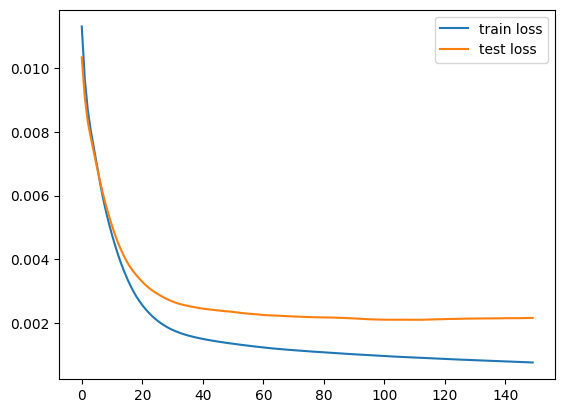

In [15]:
plt.plot(r.history['loss'],label='train loss')
plt.plot(r.history['val_loss'],label='test loss')
plt.legend();

In [16]:
train_idx[: T+1] = False

In [17]:
Ptrain = model.predict(Xtrain).flatten()
Ptest = model.predict(Xtest).flatten()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


In [18]:
df.loc[train_idx,'Diff ANN Train Prediction'] = Ptrain
df.loc[test_idx, 'Diff ANN Test Prediction'] = Ptest

In [20]:
df.tail()

,Passengers,LogPassengers,DiffLogPassengers,Diff ANN Train Prediction,Diff ANN Test Prediction
Month,,,,,
1960-08-01,606,6.406880,-0.026060,NaN,-0.058239
1960-09-01,508,6.230481,-0.176399,NaN,-0.143902
1960-10-01,461,6.133398,-0.097083,NaN,-0.065624
1960-11-01,390,5.966147,-0.167251,NaN,-0.102917
1960-12-01,432,6.068426,0.102279,NaN,0.057178


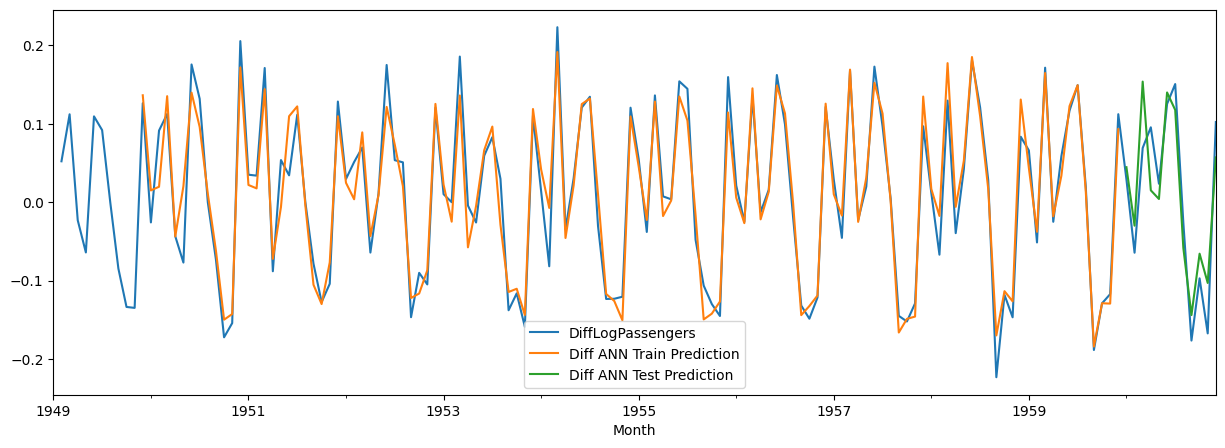

In [21]:
cols = ['DiffLogPassengers', 'Diff ANN Train Prediction', 'Diff ANN Test Prediction']
df[cols].plot(figsize=(15,5));

In [29]:
df['Diff ANN Train Prediction']

Month
1949-01-01   NaN
1949-02-01   NaN
1949-03-01   NaN
1949-04-01   NaN
1949-05-01   NaN
              ..
1960-08-01   NaN
1960-09-01   NaN
1960-10-01   NaN
1960-11-01   NaN
1960-12-01   NaN
Name: Diff ANN Train Prediction, Length: 144, dtype: float32

In [30]:
df['ShiftLogPassengers'] = df['LogPassengers'].shift(1)
prev = df['ShiftLogPassengers']

In [32]:
prev

Month
1949-01-01         NaN
1949-02-01    4.718499
1949-03-01    4.770685
1949-04-01    4.882802
1949-05-01    4.859812
                ...   
1960-08-01    6.432940
1960-09-01    6.406880
1960-10-01    6.230481
1960-11-01    6.133398
1960-12-01    5.966147
Name: ShiftLogPassengers, Length: 144, dtype: float64

In [33]:
last_train = train.iloc[-1]['LogPassengers']

In [34]:
# 1 step forecast
df.loc[train_idx, '1step_train'] = prev[train_idx] + Ptrain
df.loc[test_idx, '1step_test'] = prev[test_idx] + Ptest

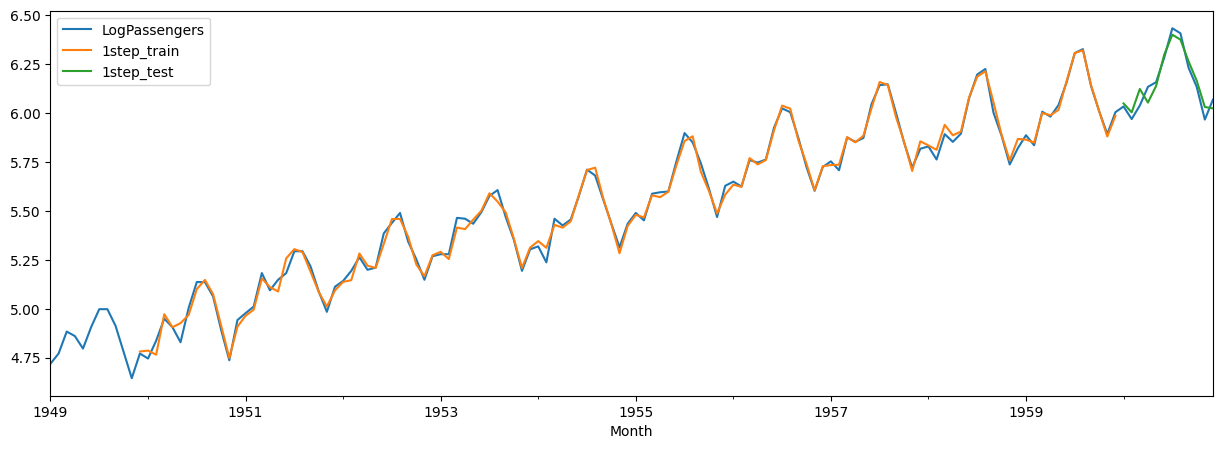

In [35]:
df[['LogPassengers', '1step_train', '1step_test']].plot(figsize=(15,5));

In [36]:
# multi-step forecast
multistep_predictions = []
last_x = Xtest[0]

while len(multistep_predictions) < Ntest:
    p = model.predict(last_x.reshape(1,-1))[0]
    multistep_predictions.append(p)
    last_x = np.roll(last_x, -1)
    last_x[-1] = p

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


C:\Program Files\KMSpico\temp\ipykernel_18476\2673190687.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  last_x[-1] = p


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


In [37]:
df.loc[test_idx, 'multistep'] = last_train + np.cumsum(multistep_predictions)

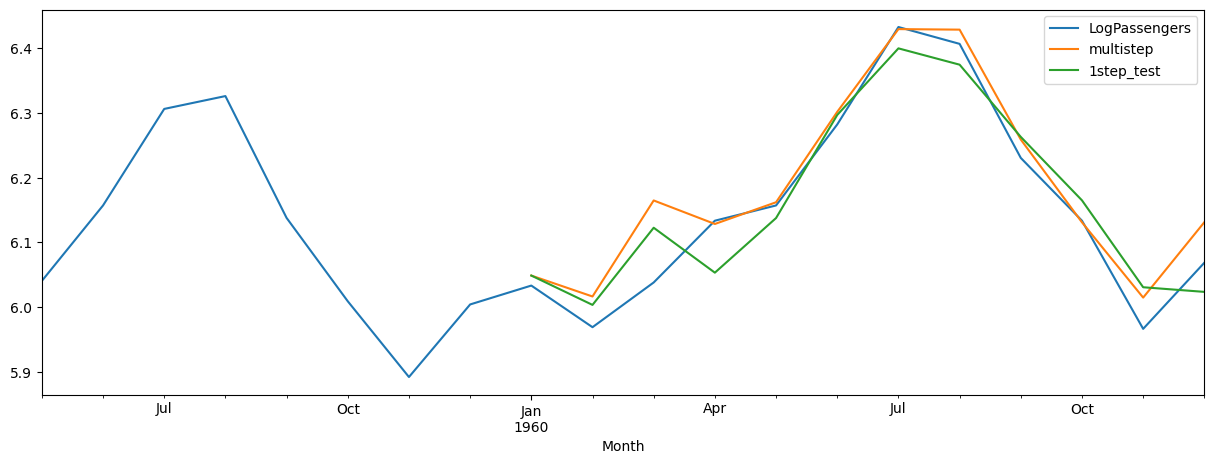

In [39]:
df[['LogPassengers', 'multistep', '1step_test']][-20:].plot(figsize=(15,5));

In [41]:
# multi-output supervised dataset
Tx = T
Ty = Ntest
X = []
Y = []
q = True
for t in range(len(series) - Tx - Ty - - 1):
    x = series[t: t+Tx]
    X.append(x)
    y = series[t+Tx:t+Tx+Ty]
    Y.append(y)
    if q:
        q = False
        print('X',X,'\n Y',Y )
X = np.array(X).reshape(-1, Tx)
Y = np.array(Y).reshape(-1, Ty)
N = len(X)
print('X.shape', X.shape, 'Y.shape', Y.shape)

X [array([ 0.05218575,  0.1121173 , -0.02298952, -0.06402186,  0.10948423,
        0.0919375 ,  0.        , -0.08455739, -0.13353139, -0.13473259])] 
 Y [array([ 0.12629373, -0.0257525 ,  0.09134978,  0.11247798, -0.04348511,
       -0.07696104,  0.17563257,  0.13185213,  0.        , -0.0732034 ,
       -0.1722459 , -0.15415068])]
X.shape (122, 10) Y.shape (122, 12)


In [42]:
Xtrain_m, Ytrain_m = X[:-1], Y[:-1]
Xtest_m, Ytest_m = X[-1:], Y[-1:]

In [43]:
i = Input(shape=(Tx,))
x = Dense(32, activation='relu')(i)
x = Dense(Ty)(x)
model = Model(i,x)

In [44]:
model.compile(loss='mse', optimizer='adam')

In [45]:
r = model.fit(Xtrain_m, Ytrain_m, epochs=150, validation_data=(Xtest_m, Ytest_m))

Epoch 1/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 98ms/step - loss: 0.0146 - val_loss: 0.0145
Epoch 2/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0135 - val_loss: 0.0132
Epoch 3/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0127 - val_loss: 0.0121
Epoch 4/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0120 - val_loss: 0.0112
Epoch 5/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0115 - val_loss: 0.0103
Epoch 6/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0110 - val_loss: 0.0095
Epoch 7/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0105 - val_loss: 0.0088
Epoch 8/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0101 - val_loss: 0.0082
Epoch 9/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0098 - val_loss: 0.0077
Epoch 10/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0095 - val_loss: 0.0073
Epoch 11/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0091 - val_loss: 0.0069
Epoch 12/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0089 - val_lo

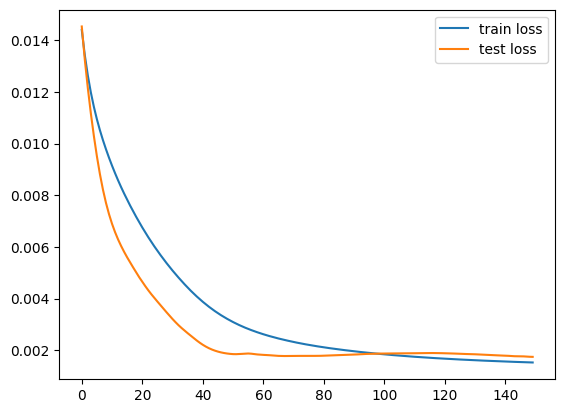

In [46]:
plt.plot(r.history['loss'], label = 'train loss')
plt.plot(r.history['val_loss'], label = 'test loss')
plt.legend();

In [58]:
Ptrain = model.predict(Xtrain_m)
Ptest = model.predict(Xtest_m)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


In [59]:
Ptrain.shape, Ptest.shape

((121, 12), (1, 12))

In [60]:
Ptrain = Ptrain[:,0]
Ptest = Ptest[0]

In [62]:
df.loc[test_idx, 'multioutput'] = last_train + np.cumsum(Ptest)

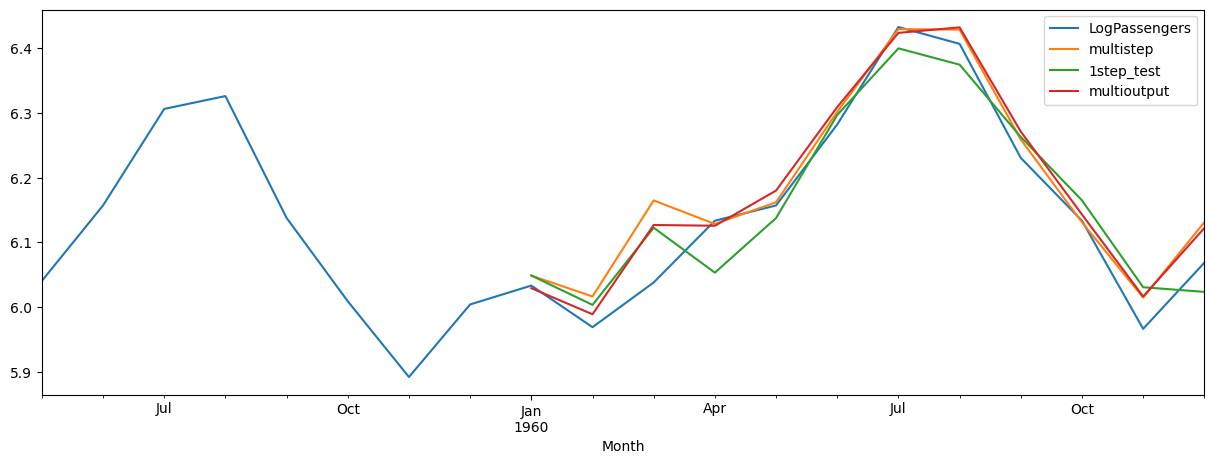

In [64]:
cols = ['LogPassengers', 'multistep', '1step_test', 'multioutput']
df[cols][-20:].plot(figsize=(15,5));

In [65]:
test_log_pass = df.iloc[-Ntest:]['LogPassengers']
mape1 = mean_absolute_percentage_error(test_log_pass, df.loc[test_idx, 'multistep'])
print('Multi-step MAPE:',mape1)
mape2 = mean_absolute_percentage_error(test_log_pass, df.loc[test_idx, 'multioutput'])
print('Multi-output MAPE:',mape2)

Multi-step MAPE: 0.005300207376680661
Multi-output MAPE: 0.004894233256327547
